## Train Chatbot Using Deep Learning with My own Data

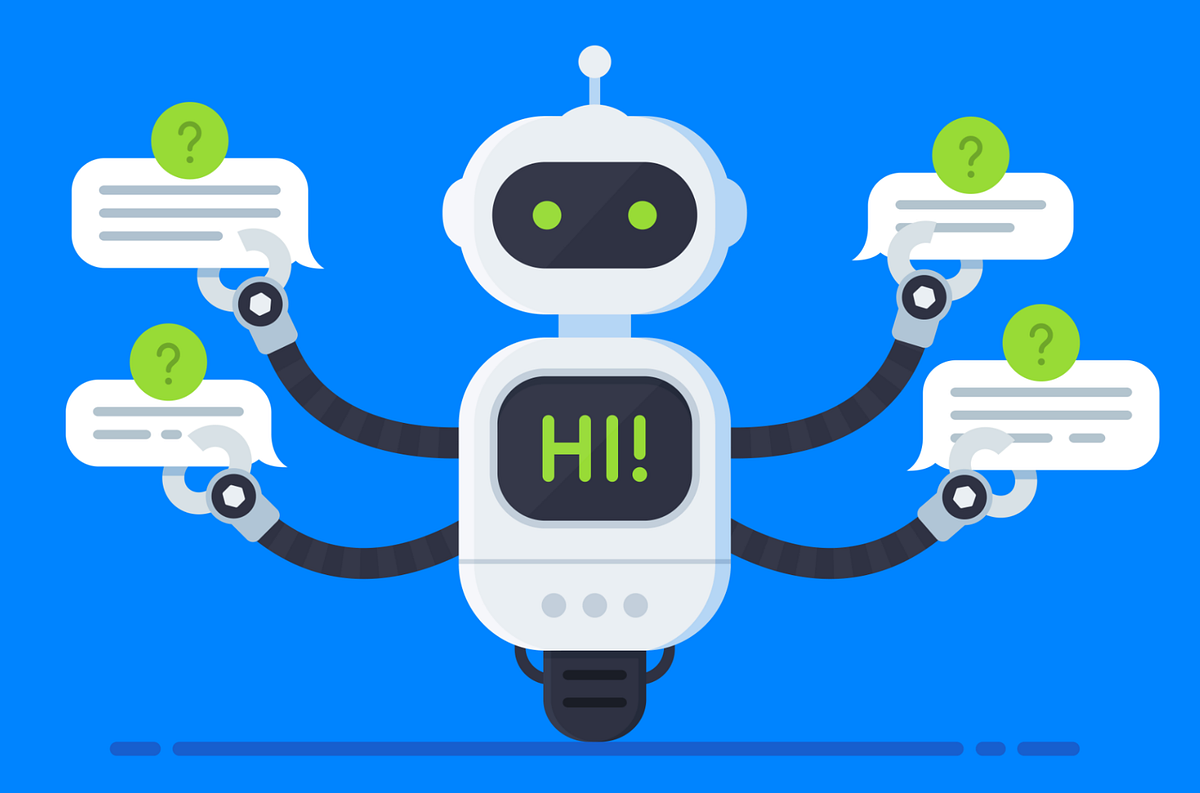

### Import Required Module

In [1]:
import nltk
import json
import pickle
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers.legacy import SGD
import random


from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents.json').read()
intents = json.loads(data_file)

In [2]:
intents

{'intents': [{'tag': 'google',
   'patterns': ['google', 'search', 'internet'],
   'responses': ['Redirecting to Google...']},
  {'tag': 'greeting',
   'patterns': ['Hi there',
    'How are you',
    'Is anyone there?',
    'Hey',
    'Hola',
    'Hello',
    'Good day',
    'Namaste',
    'yo'],
   'responses': ['Hello',
    'Good to see you again',
    'Hi there, how can I help?'],
   'context': ['']},
  {'tag': 'goodbye',
   'patterns': ['Bye',
    'See you later',
    'Goodbye',
    'Get lost',
    'Till next time',
    'bbye'],
   'responses': ['See you!', 'Have a nice day', 'Bye! Come back again soon.'],
   'context': ['']},
  {'tag': 'thanks',
   'patterns': ['Thanks',
    'Thank you',
    "That's helpful",
    'Awesome, thanks',
    'Thanks for helping me'],
   'responses': ['Happy to help!', 'Any time!', 'My pleasure'],
   'context': ['']},
  {'tag': 'noanswer',
   'patterns': [],
   'responses': ["Sorry, can't understand you",
    'Please give me more info',
    'Not sure I u

In [ ]:
#nltk.download('wordnet')

### Data PreProcessing

In [3]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [4]:
# lemmatize, lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# sort classes
classes = sorted(list(set(classes)))

# documents = combination between patterns and intents
print (len(documents), "documents")

# classes = intents
print (len(classes), "classes", classes)

# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

220 documents
72 classes ['AI', 'HR_related_problem', 'Identity', 'Location', 'Weather', 'about', 'activity', 'age', 'appointment status', 'appreciate', 'artificial intelligence', 'cabin', 'check_leave', 'commission', 'competitors_in_market', 'computers', 'configuration', 'connect_people', 'contact', 'cost_lowering', 'covid19', 'cricket', 'customer_satisfaction', 'datetime', 'domain', 'email_id', 'exclaim', 'factors_impacting_sale', 'forgot_password', 'gadgets', 'goodbye', 'google', 'greeting', 'greetreply', 'haha', 'highest_grossing', 'hours', 'inspire', 'insult', 'invalid', 'jokes', 'karan', 'key_customers', 'leave', 'maintainence', 'manufacturing_problems', 'missing_id', 'name', 'news', 'nicetty', 'no', 'noans', 'options', 'order_components', 'order_tracking', 'predict_delay', 'predict_performance', 'programmer', 'project_handling_queries', 'riddle', 'search_department', 'search_person_by_id', 'solve_problems', 'song', 'suggest', 'supplier_info', 'thanks', 'timer', 'turnover', 'vers

## Create training and testing data

In [5]:

# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


C:\Users\Abhij\AppData\Local\Temp\ipykernel_12136\2451131480.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


## Create Model Using Neural Network

In [6]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Define the optimizer (SGD) with specified parameters
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("model created")

c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\keras\src\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
44/44 [==============================] - 1s 2ms/step - loss: 4.2753 - accuracy: 0.0273
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 4.2103 - accuracy: 0.0682
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 4.1327 - accuracy: 0.0818
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 4.0437 - accuracy: 0.0818
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 3.9160 - accuracy: 0.0909
Epoch 6/200
44/44 [==============================] - 0s 2ms/step - loss: 3.7590 - accuracy: 0.1136
Epoch 7/200
44/44 [==============================] - 0s 2ms/step - loss: 3.5777 - accuracy: 0.1864
Epoch 8/200
44/44 [==============================] - 0s 2ms/step - loss: 3.3677 - accuracy: 0.2318
Epoch 9/200
44/44 [==============================] - 0s 2ms/step - loss: 3.1173 - accuracy: 0.3182
Epoch 10/200
44/44 [==============================] - 0s 1ms/step - loss: 2.8324 - accuracy: 0.3773
Epoch 11/

44/44 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9864
Epoch 84/200
44/44 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9773
Epoch 85/200
44/44 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9818
Epoch 86/200
44/44 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9864
Epoch 87/200
44/44 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9773
Epoch 88/200
44/44 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9818
Epoch 89/200
44/44 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9864
Epoch 90/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9818
Epoch 91/200
44/44 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9864
Epoch 92/200
44/44 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9818
Epoch 93/200


c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
from keras.models import load_model
model = load_model('chatbot_model.h5')
import json
import random
intents = json.loads(open('intents.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [8]:
def clean_up_sentence(sentence):
    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words
# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

In [9]:
def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words) 
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

In [10]:
def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

In [11]:
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

In [12]:
def chatbot_response(text):
    ints = predict_class(text, model)
    res = getResponse(ints, intents)
    return res

In [15]:
response=chatbot_response("what is AI")

1/1 [==============================] - 0s 38ms/step


In [16]:
response

'Artificial Intelligence is the branch of engineering and science devoted to constructing machines that think'